In [ ]:
from scipy import stats
from matplotlib import pyplot as plt 
import numpy as np
from scipy.stats import norm
from statsmodels.stats.descriptivestats import sign_test

In [ ]:
M1 = 5
M2 = 5
S1 = 3
S2 = 1
n1 = 250
n2 = 250

In [ ]:
sample1 = stats.norm(loc = M1, scale = S1**0.5).rvs(250) 

In [ ]:
print('Среднее: %.3f ' %np.mean(sample1))
print('Оценка дисперсии: %.3f' %np.var(sample1))
print('Оценка с.к.о: %.3f' %np.std(sample1))

Среднее: 5.022 
Оценка дисперсии: 2.753
Оценка с.к.о: 1.659


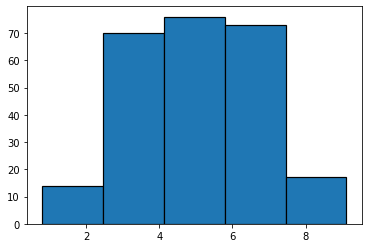

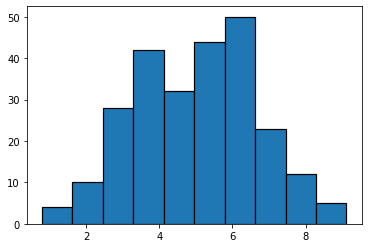

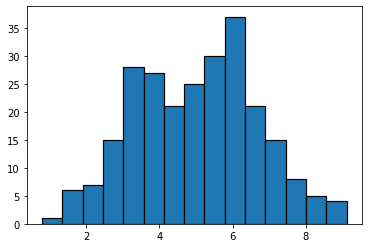

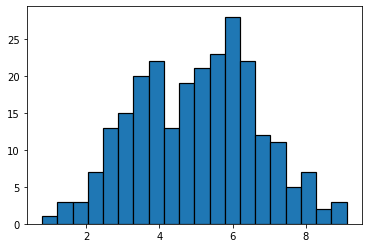

In [ ]:
plt.hist(sample1, bins = 5, edgecolor = 'black', linewidth = 1.2)
plt.show()
plt.hist(sample1, bins = 10, edgecolor = 'black', linewidth = 1.2)
plt.show()
plt.hist(sample1, bins = 15, edgecolor = 'black', linewidth = 1.2)
plt.show()
plt.hist(sample1, bins = 20, edgecolor = 'black', linewidth = 1.2)
plt.show()

46.18201707762016
[14. 70. 76. 73. 17.]
[29.24142194771668, 46.89778830277037, 55.30139785738232, 47.94775558348635, 30.565592077040737]


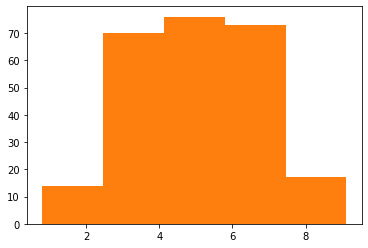

In [ ]:
frequencies_5 = plt.hist(sample1, bins = 5)[0]
bins_border_5 = plt.hist(sample1, bins = 5)[1]
center = list()
for i in range(0, 5):
  center.append((bins_border_5[i] + bins_border_5[i+1])/2)
center_mean = 0
for i in range(0, 5):
  center_mean += frequencies_5[i] * center[i] / n1
center_disp = 0
for i in range(0, 5):
  center_disp += (frequencies_5[i] * ( center[i] - center_mean)**2)/ (n1 - 1)
probability = list()
for i in range(0, 5):
  probability.append((norm.cdf((bins_border_5[i + 1] - center_mean) / center_disp)  - norm.cdf((bins_border_5[i] - center_mean) / center_disp))*n1)
z = 0
for i in range(0, 5):
  z += ((frequencies_5[i] - probability[i])**2)/probability[i]
print(z)
print(frequencies_5)
print(probability)

In [ ]:
def mean(a):                                    #среднее между группировочными данными
    b = [0]*(len(a) - 1)
    for i in range(0, len(a)-1):
        b[i] = ((a[i+1] + a[i]) / 2)
    return b

def getM(mean, frequencies, n):               #среднее всей выборки
    m = 0
    for i in range(0, len(mean)):
        m += mean[i] * frequencies[i] 
    return m/n

def getSigma(mean, frequencies, m, n):        #с.к.о всей выборки
    s = 0
    for i in range(0, len(mean)):
        s += (mean[i] - m)**2 * frequencies[i]
    return (s / (n - 1))**(1/2)

def getNP_no_merge(val, freq, n1, m, sigma):              #подсчёт вероятностной и обычных частот
  n  = list()
  np = list()
  npx = 0
  nx = 0
  distr = stats.norm(loc = m, scale = sigma)
  for i in range(0, len(val) - 1):
    npx = (distr.cdf(val[i + 1]) - distr.cdf(val[i])) * n1
    nx = freq[i]
    n.append(nx)
    np.append(npx)
     
  return (n, np)

def getZ(n, np):
    z = 0
    for i in range(0, len(n)):
        z += (n[i] - np[i])**2 / np[i]
    return z

[15.435586123316778, 58.34449223815968, 92.69997517807629, 62.090365916551484, 17.487852044656638]
[14. 70. 76. 73. 17.]
Number of grouping intervals 5
chi-squared criteria for N: z = 7.401; p-value = 0.049


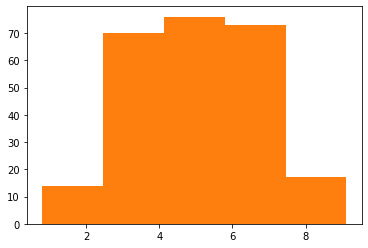

In [ ]:
#критерий хи-квадрат

frequencies_5 = plt.hist(sample1, bins=5)[0]
values_5 = plt.hist(sample1, bins=5)[1]


m = getM(mean(values_5), frequencies_5, n1)
sigma = getSigma(mean(values_5), frequencies_5, m, n1)
new_n, new_np = getNP_no_merge(values_5, frequencies_5 , n1, m, sigma)

z = getZ(new_n, new_np)
k = len(new_n)
r = 2

f_z_chi = stats.chi2.cdf(z, k - r - 1)
p_value = 2 * min(f_z_chi, 1 - f_z_chi)

print(new_np)
print(frequencies_5)
print("Number of grouping intervals 5")
print("chi-squared criteria for N: z = %.3f; p-value = %.3f" % (z, p_value))

Number of grouping intervals 10
chi-squared criteria for N: z = 11.496; p-value = 0.237


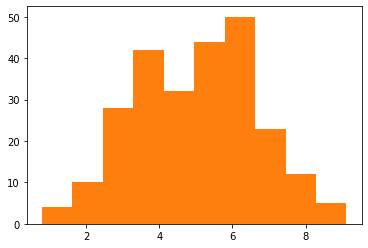

In [ ]:
#критерий хи-квадрат

frequencies_10 = plt.hist(sample1, bins=10)[0]
values_10 = plt.hist(sample1, bins=10)[1]


m = getM(mean(values_10), frequencies_10, n1)
sigma = getSigma(mean(values_10), frequencies_10, m, n1)
new_n, new_np = getNP_no_merge(values_10, frequencies_10, n1, m, sigma)

z = getZ(new_n, new_np)
k = len(new_n)
r = 2

f_z_chi = stats.chi2.cdf(z, k - r - 1)
p_value = 2 * min(f_z_chi, 1 - f_z_chi)

print("Number of grouping intervals 10")
print("chi-squared criteria for N: z = %.3f; p-value = %.3f" % (z, p_value))

Number of grouping intervals 15
chi-squared criteria for N: z = 15.399; p-value = 0.441


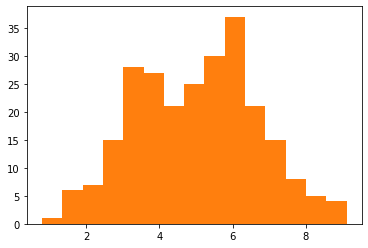

In [ ]:
#критерий хи-квадрат

frequencies_15 = plt.hist(sample1, bins=15)[0]
values_15 = plt.hist(sample1, bins=15)[1]


m = getM(mean(values_15), frequencies_15, n1)
sigma = getSigma(mean(values_15), frequencies_15, m, n1)
new_n, new_np = getNP_no_merge(values_15, frequencies_15, n1, m, sigma)

z = getZ(new_n, new_np)
k = len(new_n)
r = 2

f_z_chi = stats.chi2.cdf(z, k - r - 1)
p_value = 2 * min(f_z_chi, 1 - f_z_chi)

print("Number of grouping intervals 15")
print("chi-squared criteria for N: z = %.3f; p-value = %.3f" % (z, p_value))

Number of grouping intervals 30
chi-squared criteria for N : z = 32.068; p-value = 0.459


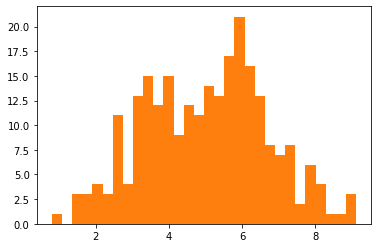

In [ ]:
#критерий хи-квадрат

frequencies_30 = plt.hist(sample1, bins=30)[0]
values_30 = plt.hist(sample1, bins=30)[1]


m = getM(mean(values_30), frequencies_30, n1)
sigma = getSigma(mean(values_30), frequencies_30, m, n1)
new_n, new_np = getNP_no_merge(values_30, frequencies_30, n1, m, sigma)

z = getZ(new_n, new_np)
k = len(new_n)
r = 2

f_z_chi = stats.chi2.cdf(z, k - r - 1)
p_value = 2 * min(f_z_chi, 1 - f_z_chi)

print("Number of grouping intervals 30")
print("chi-squared criteria for N : z = %.3f; p-value = %.3f" % (z, p_value))

Для равномерного распределения

In [ ]:
#критерий хи-квадрат для R
def getNP_R(val, freq, n1, a, b):
    n  = list()
    np = list()
    npx = 0
    nx = 0
    dis = stats.uniform(loc = a, scale = b - a)
    for i in range(0, len(val) - 1):
        npx += (dis.cdf(val[i + 1]) - dis.cdf(val[i])) * n1
        nx += freq[i]
        if npx > 5:
            n.append(nx)
            np.append(npx)
            nx = 0
            npx = 0
        elif (npx < 5) and (i == len(val) - 2):
            n[len(n) - 1] = nx + n[len(n) - 1]
            np[len(np) - 1] = npx + np[len(np) - 1]
    return (n, np)


In [ ]:
#5 intervals
m = getM(mean(values_5), frequencies_5, n1 ) 
sigma = getSigma(mean(values_5), frequencies_5, m, n1 )
a = 1/2 * (2*m - sigma * (12)**(1/2))
b = 1/2 * (2*m + sigma * (12)**(1/2))

new_n, new_np = getNP_R(values_5, frequencies_5 , n1, a, b)

z = getZ(new_n, new_np)
k = len(new_n)
r = 2

f_z_chi = stats.chi2.cdf(z, k - r - 1)
p_value = 2 * min(f_z_chi, 1 - f_z_chi)

print("Number of grouping intervals 5")
print("chi-squared criteria for R: z = %.3f; p-value = " %z, p_value)


Number of grouping intervals 5
chi-squared criteria for R: z = 3.084; p-value =  0.4280081073359292


In [ ]:
#10 intervals
m = getM(mean(values_10), frequencies_10, n1 ) 
sigma = getSigma(mean(values_10), frequencies_10, m, n1 )
a = 1/2 * (2*m - sigma * (12)**(1/2))
b = 1/2 * (2*m + sigma * (12)**(1/2))

new_n, new_np = getNP_R(values_10, frequencies_10 , n1, a, b)

z = getZ(new_n, new_np)
k = len(new_n)
r = 2

f_z_chi = stats.chi2.cdf(z, k - r - 1)
p_value = 2 * min(f_z_chi, 1 - f_z_chi)

print("Number of grouping intervals 10")
print("chi-squared criteria for R: z = %.3f; p-value = " %z, p_value)


Number of grouping intervals 10
chi-squared criteria for R: z = 15.333; p-value =  0.01805776907132417


In [ ]:
#15 intervals
m = getM(mean(values_15), frequencies_15, n1 ) 
sigma = getSigma(mean(values_15), frequencies_15, m, n1 )
a = 1/2 * (2*m - sigma * (12)**(1/2))
b = 1/2 * (2*m + sigma * (12)**(1/2))

new_n, new_np = getNP_R(values_15, frequencies_15 , n1, a, b)

z = getZ(new_n, new_np)
k = len(new_n)
r = 2

f_z_chi = stats.chi2.cdf(z, k - r - 1)
p_value = 2 * min(f_z_chi, 1 - f_z_chi)

print("Number of grouping intervals 15")
print("chi-squared criteria for R: z = %.3f; p-value = " %z, p_value)


Number of grouping intervals 15
chi-squared criteria for R: z = 17.377; p-value =  0.052821668882671036


In [ ]:
#30 intervals
m = getM(mean(values_30), frequencies_30, n1 ) 
sigma = getSigma(mean(values_30), frequencies_30, m, n1 )
a = 1/2 * (2*m - sigma * (12)**(1/2))
b = 1/2 * (2*m + sigma * (12)**(1/2))

new_n, new_np = getNP_R(values_30, frequencies_30 , n1, a, b)

z = getZ(new_n, new_np)
k = len(new_n)
r = 2

f_z_chi = stats.chi2.cdf(z, k - r - 1)
p_value = 2 * min(f_z_chi, 1 - f_z_chi)

print("Number of grouping intervals 30")
print("chi-squared criteria for R: z = %.3f; p-value = %.3f" % (z, p_value))


Number of grouping intervals 30
chi-squared criteria for R: z = 37.500; p-value = 0.009


Для ХИ-квадрат распределения:

In [ ]:
alpha = 0.1

In [ ]:
def getNP(val, freq, n1):
    n  = list()
    np = list()
    npx = 0
    nx = 0
    dis = stats.chi2(5)
    for i in range(0, len(val) - 1):
        npx += (dis.cdf(val[i + 1]) - dis.cdf(val[i])) * n1
        nx += freq[i]
        if npx > 5:
            n.append(nx)
            np.append(npx)
            nx = 0
            npx = 0
        elif (npx < 5) and (i == len(val) - 2):
            n[len(n) - 1] = nx + n[len(n) - 1]
            np[len(np) - 1] = npx + np[len(np) - 1]
    return (n, np)

In [ ]:
#5 intervals
new_n, new_np = getNP(values_5, frequencies_5 , n1)

z = getZ(new_n, new_np)
k = len(new_n)
r = 1

f_z_chi = stats.chi2.cdf(z, k - r - 1)
p_value = 2 * min(f_z_chi, 1 - f_z_chi)

print("Number of grouping intervals 5")
print("chi-squared criteria for R: z = %.3f; p-value = " %z, p_value)
print('Критическое значение: %.3f' % (stats.chi2(k-r-1).ppf(1 - alpha)))

Number of grouping intervals 5
chi-squared criteria for R: z = 81.517; p-value =  0.0
Критическое значение: 6.251


In [ ]:
#10 intervals
new_n, new_np = getNP(values_10, frequencies_10 , n1)

z = getZ(new_n, new_np)
k = len(new_n)
r = 1

f_z_chi = stats.chi2.cdf(z, k - r - 1)
p_value = 2 * min(f_z_chi, 1 - f_z_chi)

print("Number of grouping intervals 10")
print("chi-squared criteria for R: z = %.3f; p-value = " %z, p_value)
print('Критическое значение: %.3f' % (stats.chi2(k-r-1).ppf(1 - alpha)))

Number of grouping intervals 10
chi-squared criteria for R: z = 103.370; p-value =  0.0
Критическое значение: 13.362


In [ ]:
#15 intervals
new_n, new_np = getNP(values_15, frequencies_15 , n1)

z = getZ(new_n, new_np)
k = len(new_n)
r = 1

f_z_chi = stats.chi2.cdf(z, k - r - 1)
p_value = 2 * min(f_z_chi, 1 - f_z_chi)

print("Number of grouping intervals 15")
print("chi-squared criteria for R: z = %.3f; p-value = " %z, p_value)
print('Критическое значение: %.3f' % (stats.chi2(k-r-1).ppf(1 - alpha)))

Number of grouping intervals 15
chi-squared criteria for R: z = 104.482; p-value =  4.440892098500626e-16
Критическое значение: 19.812


In [ ]:
#30 intervals
new_n, new_np = getNP(values_30, frequencies_30 , n1)

z = getZ(new_n, new_np)
k = len(new_n)
r = 1

f_z_chi = stats.chi2.cdf(z, k - r - 1)
p_value = 2 * min(f_z_chi, 1 - f_z_chi)

print("Number of grouping intervals 30")
print("chi-squared criteria for R: z = %.3f; p-value = " %z, p_value)
print('Критическое значение: %.3f' % (stats.chi2(k-r-1).ppf(1 - alpha)))

Number of grouping intervals 30
chi-squared criteria for R: z = 113.016; p-value =  3.339550858072471e-13
Критическое значение: 33.196


Критерий Колмагорова:

In [ ]:
alpha = 0.05
m = sample1.mean()
sigma = sample1.std()
a = 1/2 * (2*m - sigma * (12)**(1/2))
b = 1/2 * (2*m + sigma * (12)**(1/2))
test_N = stats.kstest(sample1, stats.norm(m, sigma).cdf)
test_R = stats.kstest(sample1, stats.uniform(a, b - a).cdf)
test_chi = stats.kstest(sample1, stats.chi2(5).cdf)

print('Нормальное распределение: z = {z:.3f}, p-value = {p_value:.3f}'.format(z =test_N[0] , p_value = test_N[1]))
print('Равномерное распределение: z = {z:.3f}, p-value = {p_value:.3f}'.format(z =test_R[0] , p_value = test_R[1]))
print('Распределение хи-квадрат: z = {z:.3f}, p-value = {p_value:.3f}'.format(z =test_chi[0] , p_value = test_chi[1]))



Нормальное распределение: z = 0.053, p-value = 0.461
Равномерное распределение: z = 0.068, p-value = 0.192
Распределение хи-квадрат: z = 0.197, p-value = 0.000


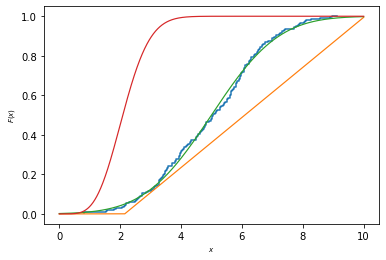

In [ ]:
from statsmodels.distributions.empirical_distribution import ECDF

ecdf = ECDF(sample1)   # строим эмпирическую функцию по выборке
grid = np.linspace(0, 10, 1000) 
plt.step(ecdf.x, ecdf.y, label='empirical CDF')
plt.ylabel('$F(x)$', fontsize=7)
plt.xlabel('$x$', fontsize=7);
#x = np.arange(0, 10, 0.01)
#plt.plot(x,norm. pdf(x, 5, 3), linewidth = 4)
#data = stats.uniform.rvs(size = 10, loc = 5, scale=3**0.5)
#plt.plot(data/len(sample1), linewidth = 4)
#data1 = stats.chi2(5).rvs(n1)
#x = np.arange (0, 10, 0.001)
plt.plot(grid, stats.uniform(a,b).cdf(grid), label = "uniform(a,b)-cdf", linewidth=1.2)
plt.plot(grid, stats.norm(5,3**0.5).cdf(grid), label = "norm(5,3**0.5)-cdf", linewidth=1.2)
plt.plot(grid, stats.chi(5).cdf(grid), label = "chi(5)-cdf", linewidth=1.2)

#plot Chi-square distribution with 4 degrees of freedom
#plt.plot (x, chi2. pdf (x, df= 5)) 
#plt.legend()

In [ ]:
#2 выборка
sample2 = stats.norm(loc = M2, scale = S2**0.5).rvs(250) 

In [ ]:
print('Среднее: %.3f ' %np.mean(sample2))
print('Оценка дисперсии: %.3f' %np.var(sample2))
print('Оценка с.к.о: %.3f' %np.std(sample2))

Среднее: 5.019 
Оценка дисперсии: 0.935
Оценка с.к.о: 0.967


Сhi-squared test: z = 14.397, p-value = 0.10889567326996592


array([ 3.,  4., 13., 37., 48., 64., 38., 24., 15.,  4.])

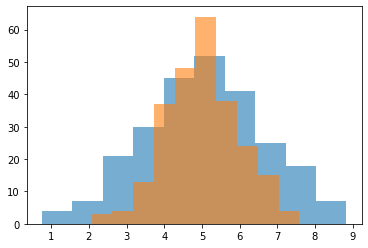

In [ ]:
#Chi-squared

result = plt.hist(sample1,  bins=10, density=False, alpha=0.6, label='Гистограмма частот')
frequencies_X = result[0]

result = plt.hist(sample2,  bins=10, density=False, alpha=0.6, label='Гистограмма частот')
frequencies_Y = result[0]

ans = stats.chisquare(f_obs = frequencies_X, f_exp = frequencies_Y)

print('Сhi-squared test: z = {z:.3f}, p-value = {p_value:}'.format(z =ans[0] , p_value = ans[1]))
frequencies_Y

In [ ]:
#KS-test

ans = stats.ks_2samp(sample1, sample2)
print('KS-test: z = {z:.3f}, p-value = {p_value:.3f}'.format(z =ans[0] , p_value = ans[1]))

KS-test: z = 0.136, p-value = 0.020


In [ ]:
#Sign test
ans = sign_test(sample1, sample2)
print('Sign test: z = {z:.3f}, p-value = {p_value:.3f}'.format(z =ans[0] , p_value = ans[1]))
ans[0]

Sign test: z = 2.000, p-value = 0.850


2.0

In [ ]:
#U-test

ans = stats.ranksums(sample1, sample2)
print('U-test: z = {z:.3f}, p-value = {p_value:.3f}'.format(z =ans[0] , p_value = ans[1]))

ans1 = stats.wilcoxon(sample1, sample2)
ans1

U-test: z = 0.417, p-value = 0.677


WilcoxonResult(statistic=15266.0, pvalue=0.7126648828344786)

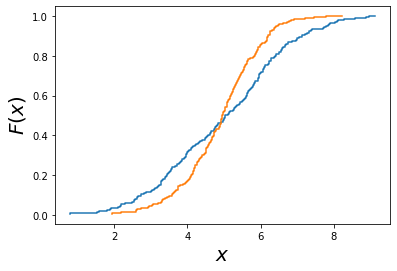

In [ ]:
#ECDF
from statsmodels.distributions.empirical_distribution import ECDF

ecdf = ECDF(sample1)   # строим эмпирическую функцию по выборке
ecdf2 = ECDF(sample2)

plt.step(ecdf.x, ecdf.y, label='empirical CDF')
plt.ylabel('$F(x)$', fontsize=20)
plt.xlabel('$x$', fontsize=20);

plt.step(ecdf2.x, ecdf2.y, label='empirical CDF')
plt.ylabel('$F(x)$', fontsize=20)
plt.xlabel('$x$', fontsize=20);

In [ ]:
#чужое решение
#U-test

ans = stats.ranksums(sample1, sample2)
print('U-test: z = {z:.3f}, p-value = {p_value:.3f}'.format(z =ans[0] , p_value = ans[1]))

ans1 = stats.wilcoxon(sample1, sample2)
ans1

U-test: z = 0.422, p-value = 0.673


WilcoxonResult(statistic=14963.0, pvalue=0.5267197724437065)

In [ ]:
#Sign test
sample2 = stats.chi2(5).rvs(250)
ans = sign_test(sample1, sample2)
print('Sign test: z = {z:.3f}, p-value = {p_value:.3f}'.format(z =ans[0] , p_value = ans[1]))
ans[0]

Sign test: z = 8.000, p-value = 0.343


8.0

In [ ]:
#KS-test

ans = stats.ks_2samp(sample1, sample2)
print('KS-test: z = {z:.3f}, p-value = {p_value:.3f}'.format(z =ans[0] , p_value = ans[1]))

KS-test: z = 0.180, p-value = 0.001


Сhi-squared test: z = 947.238, p-value = 0.000


array([32., 70., 67., 44., 18.,  5.,  7.,  4.,  1.,  2.])

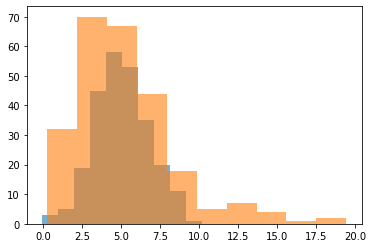

In [ ]:
#Chi-squared

result = plt.hist(sample1,  bins=10, density=False, alpha=0.6, label='Гистограмма частот')
frequencies_X = result[0]

result = plt.hist(sample2,  bins=10, density=False, alpha=0.6, label='Гистограмма частот')
frequencies_Y = result[0]

ans = stats.chisquare(f_obs = frequencies_X, f_exp = frequencies_Y)

print('Сhi-squared test: z = {z:.3f}, p-value = {p_value:.3f}'.format(z =ans[0] , p_value = ans[1]))
frequencies_Y